In [1]:
import scipy.stats as stats
import pandas as pd

In [2]:
diamond = pd.read_excel('inferential_statistics.xlsx',sheet_name ='Sheet1')
print(diamond)

    IDNO.  WEIGHT COLOR CLARRITY RATER  PRICE
0       1    0.31     D      VS1   GIA   1641
1       2    0.31     I      VS1   GIA   1126
2       3    0.34     E      VS1   GIA   1693
3       4    0.34     H      VS2   GIA   1222
4       5    0.36     F      VS1   GIA   1635
5       6    0.40     H      VS1   GIA   1525
6       7    0.48     G     VVS2   GIA   2532
7       8    0.50     G      VS1   GIA   3016
8       9    0.52     F     VVS2   GIA   3635
9      10    0.53     G     VVS2   GIA   3407
10     11    0.55     G     VVS2   GIA   3529
11     12    0.60     F      VS1   GIA   4291
12     13    0.70     F      VS1   GIA   5510
13     14    0.72     F      VS1   GIA   5586
14     15    0.82     I      VS2   GIA   4948
15     16    0.90     I     VVS2   GIA   6682
16     17    0.56     E      VS1   GIA   3900
17     18    0.70     F     VVS1   GIA   6825
18     19    0.71     D      VS1   GIA   6372
19     20    0.73     E      VS2   GIA   5738


In [3]:
#take mean of the required variable
diamond['WEIGHT'].mean()

0.5539999999999999

In [4]:
#performing one-sample t-test the significance value is 0.05
stats.ttest_1samp(diamond['WEIGHT'],0.5)#0.5 is the average weight
#since the p-value is greater then the significance value we accept the null hypothesis

Ttest_1sampResult(statistic=1.358653216241876, pvalue=0.19016924006729957)

In [5]:
age = pd.read_excel('inferential_statistics.xlsx',sheet_name='Sheet2')
print(age)

    patid  age  gender
0       1   45    Male
1       2   56    Male
2       3   50    Male
3       4   46  Female
4       5   64    Male
5       6   49  Female
6       7   63    Male
7       8   63  Female
8       9   52    Male
9      10   45    Male
10     11   61  Female
11     12   49  Female
12     13   61  Female
13     14   59    Male
14     15   52    Male
15     16   60  Female


In [6]:
# seperating the f groups by age
f_age = age[age['gender']== 'Female']['age']
print(f_age)
m_age = age[age['gender'] == 'Male']['age']
print(m_age)

3     46
5     49
7     63
10    61
11    49
12    61
15    60
Name: age, dtype: int64
0     45
1     56
2     50
4     64
6     63
8     52
9     45
13    59
14    52
Name: age, dtype: int64


In [7]:
print(f_age.mean())
print(m_age.mean())

55.57142857142857
54.0


In [8]:
# running independent t-test

stats.ttest_ind(a = f_age, b = m_age, equal_var = True)

Ttest_indResult(statistic=0.43857105472706254, pvalue=0.6676644357450686)

In [9]:
score = pd.read_excel('inferential_statistics.xlsx',sheet_name='Sheet3')
print(score)

    Student  Test A  Test B
0         1       9      17
1         2      10      24
2         3      12      17
3         4      16      19
4         5      16      15
5         6      17      16
6         7       9      15
7         8       9      25
8         9      13      15
9        10      13      25
10       11      15      21
11       12      14      21
12       13       9      16
13       14      11      25
14       15      12      25
15       16      14      19
16       17      12      24
17       18      15      20
18       19      11      22
19       20      13      24


In [10]:
before = score['Test A']
after = score['Test B']

In [11]:
# performing paried t-test
stat,pval = stats.ttest_rel(a = before, b= after)
print('%0.3f'%pval)#pval<SV therfore null hypothesis is rejected

0.000


In [12]:
import matplotlib
%matplotlib inline

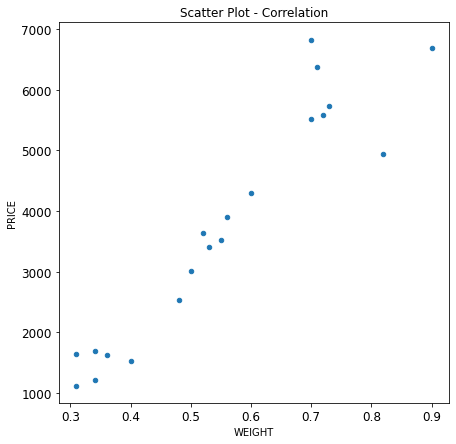

In [13]:
# We are using the same diamond dataset we used in the first test
Scatterplot = diamond.plot(kind = 'scatter', x= 'WEIGHT', y='PRICE', figsize=(7,7), title='Scatter Plot - Correlation', fontsize= 12)

In [14]:
diamond['WEIGHT'].corr(diamond['PRICE'])

0.9457713913032358

In [15]:
diamond.corr(method = 'spearman')# can also use pearson

,IDNO.,WEIGHT,PRICE
IDNO.,1.000000,0.928115,0.921805
WEIGHT,0.928115,1.000000,0.925104
PRICE,0.921805,0.925104,1.000000


In [16]:
smoke = pd.read_excel('inferential_statistics.xlsx',sheet_name='Sheet4')
print(smoke)

    ID Gender Smoke
0    1      M   yes
1    2      M   yes
2    3      F    no
3    4      F    no
4    5      F   yes
5    6      F    no
6    7      F    no
7    8      M   yes
8    9      M    no
9   10      F   yes
10  11      M    no
11  12      F    no
12  13      M   yes
13  14      M   yes
14  15      F    no
15  16      F   yes
16  17      M   yes
17  18      F   yes
18  19      M    no


In [17]:
# created a frequency table using the panda library
smoke_table = pd.crosstab(index = smoke["Gender"], columns = smoke["Smoke"])
smoke_table

Smoke,no,yes
Gender,,
F,6,4
M,3,6


In [18]:
chi2, p, ddof, expected = stats.chi2_contingency(smoke_table)
msg = "Test Statistics: {}\np-value: {}\nDegree of Freedom: {}\n"
print(msg.format(chi2, p, ddof))
print(expected)

Test Statistics: 0.4931790123456795
p-value: 0.4825126366316421
Degree of Freedom: 1

[[4.73684211 5.26315789]
 [4.26315789 4.73684211]]
